#### Carregando as importações

In [1]:
import import_ipynb
from image_data_generator import *

importing Jupyter notebook from image_data_generator.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_models_DL.ipynb
importing Jupyter notebook from c:\Users\joao.correia\Documents\Faculdade\Monografia_Joao_Victor_A_Correia\imports\imports_common_metrics.ipynb
Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [2]:
# Cria modelo
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(*IMAGE_SIZE, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

In [3]:
# Compila modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Treinar modelo
history = model.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/30
161/161 [==============================] - 82s 505ms/step - loss: 1.0046 - accuracy: 0.5188 - val_loss: 1.1972 - val_accuracy: 0.4144
Epoch 2/30
161/161 [==============================] - 90s 557ms/step - loss: 0.8411 - accuracy: 0.6011 - val_loss: 1.2822 - val_accuracy: 0.3417
Epoch 3/30
161/161 [==============================] - 89s 553ms/step - loss: 0.6377 - accuracy: 0.7213 - val_loss: 1.4716 - val_accuracy: 0.3612
Epoch 4/30
161/161 [==============================] - 90s 560ms/step - loss: 0.4358 - accuracy: 0.8227 - val_loss: 1.5419 - val_accuracy: 0.4918
Epoch 5/30
161/161 [==============================] - 88s 547ms/step - loss: 0.2471 - accuracy: 0.9076 - val_loss: 1.3570 - val_accuracy: 0.5426
Epoch 6/30
161/161 [==============================] - 85s 528ms/step - loss: 0.1458 - accuracy: 0.9498 - val_loss: 1.4526 - val_accuracy: 0.5606
Epoch 7/30
161/161 [==============================] - 94s 581ms/step - loss: 0.0743 - accuracy: 0.9727 - val_loss: 1.7818 - val_ac

In [18]:
# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(dataset_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

200/200 [==============================] - 14s 70ms/step - loss: 0.5072 - accuracy: 0.9352
Test Loss: 0.5071520209312439
Test Accuracy: 0.9351562261581421


In [19]:
# Prever as classes do conjunto de teste
dataset_test.reset()
predictions = model.predict(dataset_test)
predicted_classes = np.argmax(predictions, axis=1)

# Obter as classes verdadeiras do conjunto de teste
true_classes = dataset_test.classes

# Obter os rótulos das classes
class_labels = list(dataset_test.class_indices.keys())

# Imprimir o relatório de classificação
print('Classification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

200/200 [==============================] - 15s 72ms/step
Classification Report:
                    precision    recall  f1-score   support

     Mild_Demented       0.96      0.87      0.91       896
 Moderate_Demented       1.00      0.89      0.94        64
      Non_Demented       0.96      0.95      0.95      3200
Very_Mild_Demented       0.89      0.95      0.92      2240

          accuracy                           0.94      6400
         macro avg       0.95      0.91      0.93      6400
      weighted avg       0.94      0.94      0.94      6400



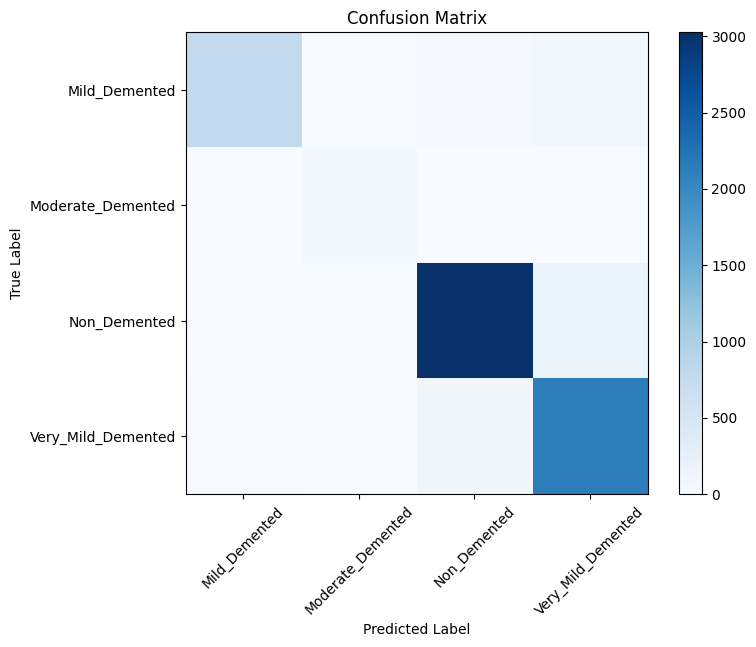

In [20]:
# Calcular e plotar a matriz de confusão
confusion_mtx = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()